In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
data = pd.read_csv("D:\\Data Science Masterclass\\cardio.csv")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data.shape

(70000, 13)

In [7]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
data.duplicated().sum()

0

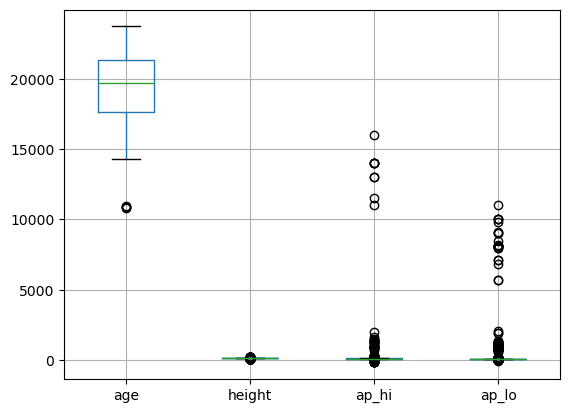

In [11]:
data[["age","height","ap_hi","ap_lo"]].boxplot()
plt.show()

In [13]:
data["age"]=(data["age"]/365).astype(int)

In [15]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [17]:
data["bmi"]=data["weight"]/((data["height"]/100)**2)

In [19]:
data.drop(["id","height","weight"],axis=1,inplace=True)

In [21]:
data.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,110,80,1,1,0,0,1,0,21.967120
1,55,1,140,90,3,1,0,0,1,1,34.927679
2,51,1,130,70,3,1,0,0,0,1,23.507805
3,48,2,150,100,1,1,0,0,1,1,28.710479
4,47,1,100,60,1,1,0,0,0,0,23.011177


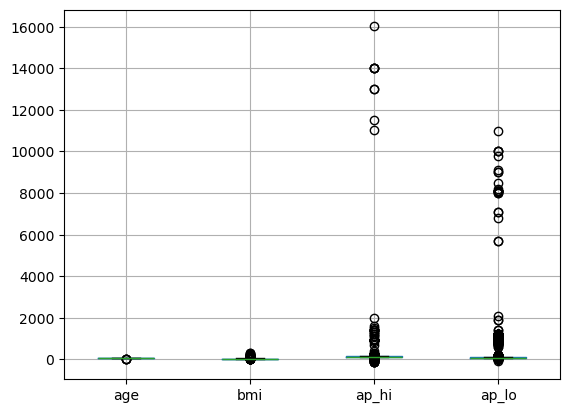

In [23]:
data[["age","bmi","ap_hi","ap_lo"]].boxplot()
plt.show()

In [25]:
df = data[["age","bmi","ap_hi","ap_lo"]]

In [27]:
Q1 = df.quantile(0.25,numeric_only=True)
Q3 = df.quantile(0.75,numeric_only=True)

In [29]:
IQR = Q3-Q1
IQR

age      10.000000
bmi       6.347107
ap_hi    20.000000
ap_lo    10.000000
dtype: float64

In [31]:
LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR

In [33]:
df = data[["age","bmi","ap_hi","ap_lo"]]

In [35]:
out_rows = ((df<LL)| (df>UL)).any(axis=1)
out_rows

0        False
1        False
2        False
3        False
4         True
         ...  
69995    False
69996     True
69997     True
69998    False
69999    False
Length: 70000, dtype: bool

In [37]:
data = data[~out_rows]

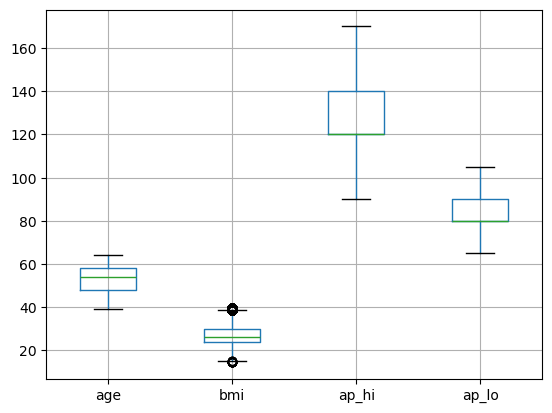

In [39]:
data[["age","bmi","ap_hi","ap_lo"]].boxplot()
plt.show()

In [41]:
data[["age","bmi","ap_hi","ap_lo"]].describe()

,age,bmi,ap_hi,ap_lo
count,62745.000000,62745.000000,62745.000000,62745.000000
mean,52.882413,27.034727,126.404319,81.689537
std,6.746333,4.406103,14.296927,7.673500
min,39.000000,14.479500,90.000000,65.000000
25%,48.000000,23.875115,120.000000,80.000000
50%,54.000000,26.222222,120.000000,80.000000
75%,58.000000,29.757585,140.000000,90.000000
max,64.000000,39.736121,170.000000,105.000000


In [43]:
data["cardio"].value_counts()

cardio
0    31783
1    30962
Name: count, dtype: int64

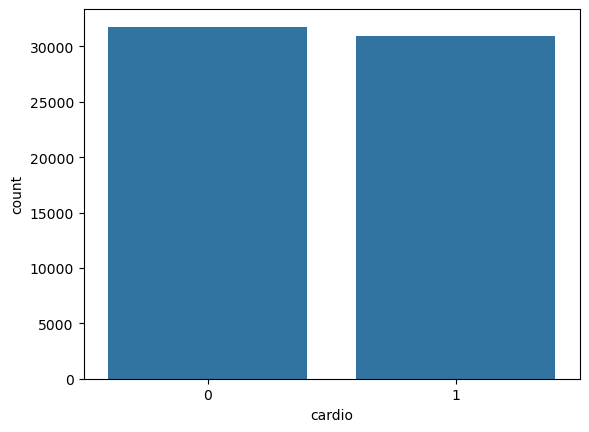

In [45]:
sns.countplot(data=data,x="cardio")
plt.show()

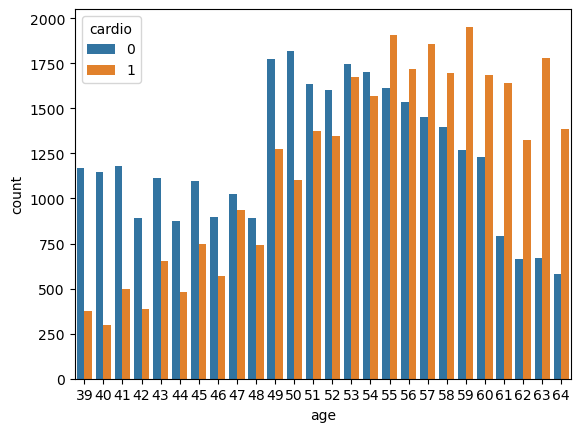

In [47]:
sns.countplot(data=data,x="age",hue="cardio")
plt.show()

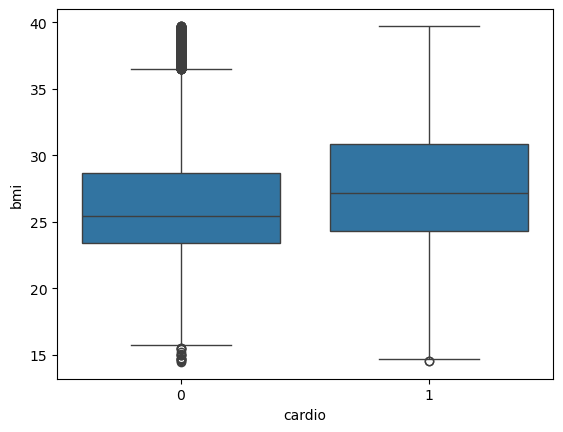

In [49]:
sns.boxplot(x="cardio",y="bmi",data=data)
plt.show()

In [51]:
data[["age","bmi","ap_hi","ap_lo"]].corr()

,age,bmi,ap_hi,ap_lo
age,1.000000,0.103261,0.202365,0.144933
bmi,0.103261,1.000000,0.242064,0.213491
ap_hi,0.202365,0.242064,1.000000,0.705185
ap_lo,0.144933,0.213491,0.705185,1.000000


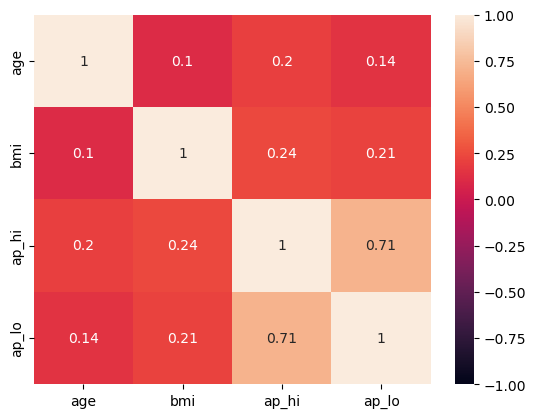

In [53]:
sns.heatmap(data[["age","bmi","ap_hi","ap_lo"]].corr(),annot=True,vmin=-1,vmax=+1)
plt.show()

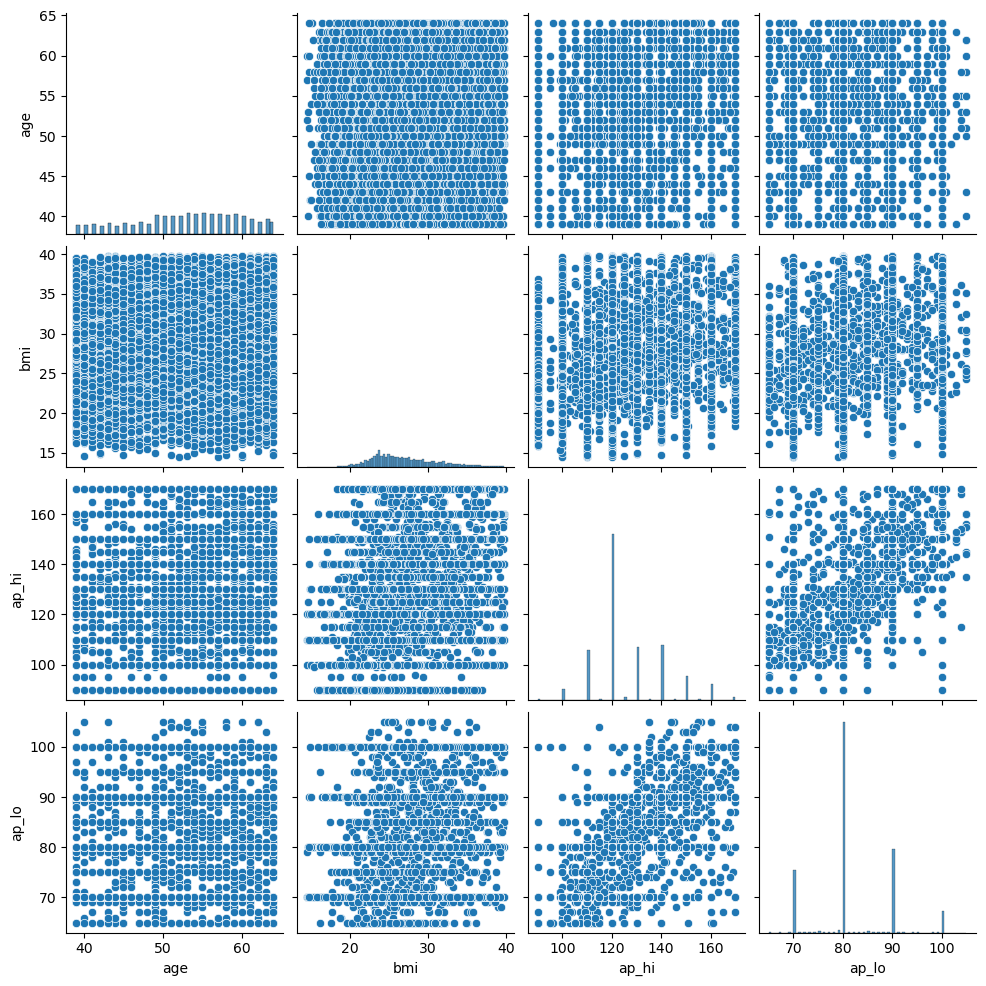

In [55]:
sns.pairplot(data[["age","bmi","ap_hi","ap_lo"]])
plt.show()

In [57]:
df1 = data[["age","bmi","ap_hi","ap_lo"]]
df1["cardio"] = ["Yes" if m==1 else "No" for m in data["cardio"]]
df1.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_12068\1053042327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["cardio"] = ["Yes" if m==1 else "No" for m in data["cardio"]]


,age,bmi,ap_hi,ap_lo,cardio
0,50,21.967120,110,80,No
1,55,34.927679,140,90,Yes
2,51,23.507805,130,70,Yes
3,48,28.710479,150,100,Yes
5,60,29.384676,120,80,No


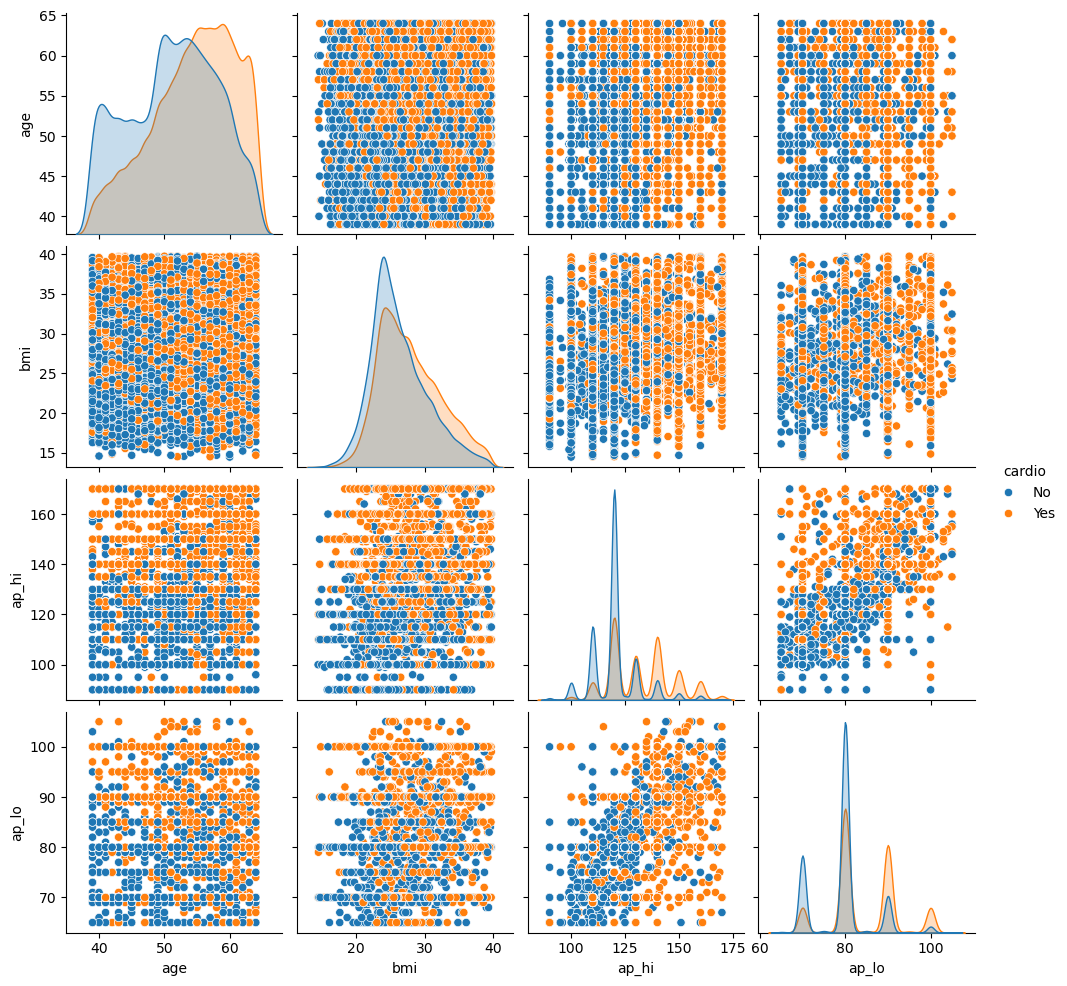

In [59]:
sns.pairplot(data=df1,hue="cardio")
plt.show()

In [61]:
data.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,110,80,1,1,0,0,1,0,21.967120
1,55,1,140,90,3,1,0,0,1,1,34.927679
2,51,1,130,70,3,1,0,0,0,1,23.507805
3,48,2,150,100,1,1,0,0,1,1,28.710479
5,60,1,120,80,2,2,0,0,0,0,29.384676


In [63]:
data = data.reindex(columns=["age","ap_hi","ap_lo","bmi","gender","cholesterol","gluc","smoke","alco","active","cardio"])

In [65]:
data.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,2,1,1,0,0,1,0
1,55,140,90,34.927679,1,3,1,0,0,1,1
2,51,130,70,23.507805,1,3,1,0,0,0,1
3,48,150,100,28.710479,2,1,1,0,0,1,1
5,60,120,80,29.384676,1,2,2,0,0,0,0


In [67]:
data["cardio"].value_counts()

cardio
0    31783
1    30962
Name: count, dtype: int64

In [69]:
le=LabelEncoder()
data["gender"]=le.fit_transform(data["gender"])

In [71]:
data.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
5,60,120,80,29.384676,0,2,2,0,0,0,0


In [73]:
ohe=OneHotEncoder()

In [75]:
ohot_encoded1=ohe.fit_transform(data["cholesterol"].values.reshape(len(data["cholesterol"].values),1)).toarray()
ohot_encoded1=ohot_encoded1[:,1:].astype(int)
df_ohot1=pd.DataFrame(ohot_encoded1,columns=["Above Nor Chol","Well Above Nor Chol"])
df_ohot1

,Above Nor Chol,Well Above Nor Chol
0,0,0
1,0,1
2,0,1
3,0,0
4,1,0
...,...,...
62740,0,0
62741,0,0
62742,0,0
62743,0,0


In [77]:
ohot_encoded2=ohe.fit_transform(data["gluc"].values.reshape(len(data["gluc"].values),1)).toarray()
ohot_encoded2=ohot_encoded2[:,1:].astype(int)
df_ohot2=pd.DataFrame(ohot_encoded2,columns=["Above Nor Gluc","Well Above Nor Gluc"])
df_ohot2

,Above Nor Gluc,Well Above Nor Gluc
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
62740,0,0
62741,0,0
62742,0,0
62743,1,0


In [79]:
data.reset_index(inplace=True)
data

,index,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,110,80,21.967120,1,1,1,0,0,1,0
1,1,55,140,90,34.927679,0,3,1,0,0,1,1
2,2,51,130,70,23.507805,0,3,1,0,0,0,1
3,3,48,150,100,28.710479,1,1,1,0,0,1,1
4,5,60,120,80,29.384676,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62740,69993,53,130,90,23.661439,0,1,1,0,0,1,1
62741,69994,57,150,80,29.384757,0,1,1,0,0,1,1
62742,69995,52,120,80,26.927438,1,1,1,1,0,1,0
62743,69998,61,135,80,27.099251,0,1,2,0,0,0,1


In [81]:
data.drop("index",axis=1,inplace=True)
data.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
4,60,120,80,29.384676,0,2,2,0,0,0,0


In [83]:
x = pd.concat([data.iloc[:,:10],df_ohot1,df_ohot2],axis=1)
x.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,Above Nor Chol,Well Above Nor Chol,Above Nor Gluc,Well Above Nor Gluc
0,50,110,80,21.967120,1,1,1,0,0,1,0,0,0,0
1,55,140,90,34.927679,0,3,1,0,0,1,0,1,0,0
2,51,130,70,23.507805,0,3,1,0,0,0,0,1,0,0
3,48,150,100,28.710479,1,1,1,0,0,1,0,0,0,0
4,60,120,80,29.384676,0,2,2,0,0,0,1,0,1,0


In [85]:
x.drop(["cholesterol","gluc"],axis=1,inplace=True)
x.head()

,age,ap_hi,ap_lo,bmi,gender,smoke,alco,active,Above Nor Chol,Well Above Nor Chol,Above Nor Gluc,Well Above Nor Gluc
0,50,110,80,21.967120,1,0,0,1,0,0,0,0
1,55,140,90,34.927679,0,0,0,1,0,1,0,0
2,51,130,70,23.507805,0,0,0,0,0,1,0,0
3,48,150,100,28.710479,1,0,0,1,0,0,0,0
4,60,120,80,29.384676,0,0,0,0,1,0,1,0


In [87]:
x = x.values
y = data.iloc[:,10].values

In [89]:
sc=StandardScaler()

In [91]:
x[:,:4]=sc.fit_transform(x[:,:4])

In [93]:
x[:,:4]

array([[-0.42725964, -1.14741093, -0.2201799 , -1.15014289],
       [ 0.31388961,  0.95095888,  1.08301675,  1.79138238],
       [-0.27902979,  0.25150228, -1.52337654, -0.80046937],
       ...,
       [-0.13079994, -0.44795433, -0.2201799 , -0.02435046],
       [ 1.20326872,  0.60123058, -0.2201799 ,  0.01464426],
       [ 0.46211946, -0.44795433, -0.2201799 , -0.48143443]])

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [97]:
model1 = KNeighborsClassifier(n_neighbors=50)
model2 = LogisticRegression()
model3 = SVC(kernel="rbf",C=1)
model4 = RandomForestClassifier(n_estimators=500)

T1 = ("knn",model1)
T2 = ("lgr",model2)
T3 = ("svm",model3)
T4 = ("rf",model4)

model=VotingClassifier(estimators=[T1,T2,T3,T4],voting="hard")

In [99]:
model.fit(x_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=50)),
                             ('lgr', LogisticRegression()), ('svm', SVC(C=1)),
                             ('rf', RandomForestClassifier(n_estimators=500))])

In [100]:
y_pred=model.predict(x_test)

In [101]:
confusion_matrix(y_test,y_pred)

array([[5189, 1226],
       [2225, 3909]], dtype=int64)

In [102]:
accuracy_score(y_test,y_pred)

0.7249980078093872

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      6415
           1       0.76      0.64      0.69      6134

    accuracy                           0.72     12549
   macro avg       0.73      0.72      0.72     12549
weighted avg       0.73      0.72      0.72     12549

